# Intro ML Homework 5
## Name: Jaskin Kabir
## Student ID: 801186717
Github: https://github.com/jaskinkabir/Intro_ML/tree/main/HM5

In [2]:
import torch
import torch.optim as optim

def linear_model(t_f, w, b):
    return w * t_f + b

def quad_model(t_f, w2, w1, b):
    return w2 * t_f**2 + w1 * t_f + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

def train(epochs, alpha, params, t_f, t_c, model):
    optimizer = optim.Adam([params], lr=alpha)
    for epoch in range(1, epochs+1):
        if params.grad is not None: params.grad.zero_()
        t_p = model(t_f, *params)
        loss = loss_fn(t_p, t_c)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
            
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params
        
#device = torch.device("cuda" if torch.cuda.is_p2vailable() else "cpu")

t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_f = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])
params=torch.tensor([1.0, 0.0], requires_grad=True)
lin_params = train(
    epochs=5000, 
    alpha=1e-1, 
    params = params,
    model=linear_model,
    t_f=t_f,
    t_c=t_c
)

Epoch 500, Loss 7.612900
Epoch 1000, Loss 3.086700
Epoch 1500, Loss 2.928579
Epoch 2000, Loss 2.927644
Epoch 2500, Loss 2.927645
Epoch 3000, Loss 2.927646
Epoch 3500, Loss 2.927645
Epoch 4000, Loss 2.927646
Epoch 4500, Loss 2.927646
Epoch 5000, Loss 2.927645


In [3]:



alphas = [1e-1, 1e-2, 1e-3, 1e-4]
quad_params = []
for alpha in alphas:
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
    print('alpha:', alpha)
    print('*'*15)

    quad_params.append(train(
        epochs=5000, 
        alpha=alpha, 
        params = params,
        model=quad_model,
        t_f=t_f,
        t_c=t_c
    ))
    print('params:', params)
    print('*'*15)

alpha: 0.1
***************


Epoch 500, Loss 4.844501
Epoch 1000, Loss 3.785645
Epoch 1500, Loss 3.466678
Epoch 2000, Loss 3.406405
Epoch 2500, Loss 3.377976
Epoch 3000, Loss 3.344335
Epoch 3500, Loss 3.301921
Epoch 4000, Loss 3.249141
Epoch 4500, Loss 3.184418
Epoch 5000, Loss 3.106353
params: tensor([ 0.0057, -0.0683, -2.5687], requires_grad=True)
***************
alpha: 0.01
***************
Epoch 500, Loss 6.108696
Epoch 1000, Loss 5.984360
Epoch 1500, Loss 5.809033
Epoch 2000, Loss 5.586318
Epoch 2500, Loss 5.320904
Epoch 3000, Loss 5.021267
Epoch 3500, Loss 4.701310
Epoch 4000, Loss 4.380754
Epoch 4500, Loss 4.083409
Epoch 5000, Loss 3.832656
params: tensor([ 0.0054, -0.0698, -1.2251], requires_grad=True)
***************
alpha: 0.001
***************
Epoch 500, Loss 3668163.000000
Epoch 1000, Loss 768786.437500
Epoch 1500, Loss 90021.125000
Epoch 2000, Loss 4791.340332
Epoch 2500, Loss 98.014191
Epoch 3000, Loss 6.609711
Epoch 3500, Loss 6.117271
Epoch 4000, Loss 6.096756
Epoch 4500, Loss 6.071091
Epoch 5000, L

In [4]:
from torch import nn

def train_model(epochs, alpha, model, x, y, loss_fn):
    optimizer = torch.optim.Adam(model.parameters(), lr=alpha)
    for epoch in range(1, epochs+1):
        
        y_p = model(x)
        loss = loss_fn(y_p, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
            
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
        


seq_model = nn.Sequential(
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13, 1)
)

train_model(
    5000,
    1e-1,
    seq_model,
    t_f.reshape(-1, 1),
    t_c.reshape(-1, 1),
    nn.functional.mse_loss
)

Epoch 500, Loss 77.136360
Epoch 1000, Loss 77.136360
Epoch 1500, Loss 77.136360
Epoch 2000, Loss 77.136360
Epoch 2500, Loss 77.136360
Epoch 3000, Loss 77.136360
Epoch 3500, Loss 77.136360
Epoch 4000, Loss 77.136360
Epoch 4500, Loss 77.136360
Epoch 5000, Loss 77.136360


In [5]:
import matplotlib.pyplot as plt

quad_params = quad_params[0]

t_p_lin = linear_model(t_f, *lin_params)
t_p_quad = quad_model(t_f, *quad_params)






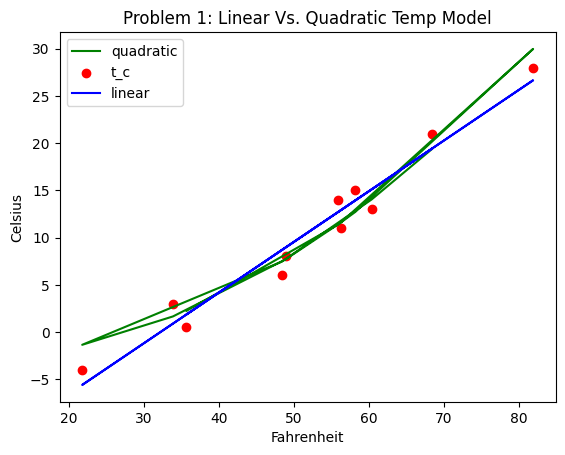

In [6]:
plt.plot(t_f, t_p_quad.detach().numpy(), color='green', label='quadratic')
plt.scatter(t_f, t_c, color='red', label='t_c')
plt.plot(t_f, t_p_lin.detach().numpy(), color='blue', label='linear')
plt.title("Problem 1: Linear Vs. Quadratic Temp Model")
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")

plt.legend()
plt.show()


In [7]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


path = 'housing.csv'
housing = pd.DataFrame(pd.read_csv(path))

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0, 'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

df_train, df_test = train_test_split(housing, train_size=0.8, test_size=0.2, random_state=100)

y_train = df_train.pop('price')
X_train = df_train

y_test = df_test.pop('price')
X_test = df_test
X_train.head()

a_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_p2 = housing[a_vars]
X_train_df_p2 = X_train[a_vars]
X_test_df_p2 = X_test[a_vars]
X_train_df_p2.head()

X_train_p2 = X_train_df_p2.to_numpy()
X_test_p2 = X_test_df_p2.to_numpy()

Y_train = y_train.to_numpy().reshape(-1,1)
Y_test = y_test.to_numpy().reshape(-1,1)

b_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X_p3 = housing[b_vars]
X_train_df_p3 = X_train[b_vars]
X_test_df_p3 = X_test[b_vars]

X_train_p3 = X_train_df_p3.to_numpy()
X_test_p3 = X_test_df_p3.to_numpy()

scaler = preprocessing.StandardScaler().fit(X_train_p2)
X_train_p2 = scaler.transform(X_train_p2)
X_test_p2 = scaler.transform(X_test_p2)

scaler = preprocessing.StandardScaler().fit(X_train_p3)
X_train_p3 = scaler.transform(X_train_p3)
X_test_p3 = scaler.transform(X_test_p3)

X_train_p2 = torch.tensor(X_train_p2, dtype=torch.float32)
X_test_p2 = torch.tensor(X_test_p2, dtype=torch.float32)
X_train_p3 = torch.tensor(X_train_p3, dtype=torch.float32)
X_test_p3 = torch.tensor(X_test_p3, dtype=torch.float32)

Y_train = torch.tensor(Y_train, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32)





In [28]:
from torch import nn
import torch

class CustomMSELoss(nn.Module):
    def __init__(self, lambda_val=0.0):
        super(CustomMSELoss, self).__init__()
        self.lambda_val = lambda_val
    
    def forward(self, predictions, targets, model):

        m = targets.size(0)
        
        errors = predictions - targets
        mse_loss = (1 / (2*m)) * torch.sum(errors ** 2)
        

        regularization_term = self.lambda_val * torch.sum(model.linear.weight ** 2)
        

        total_loss = mse_loss + regularization_term
        
        return total_loss

class Model(nn.Module):
    
    def __init__(self, feature_count):
        super(Model, self).__init__()
        self.linear = nn.Linear(feature_count, 1).double()
        
    def forward(self, x):
        x = x.double()
        y_pred = self.linear(x)
        return y_pred
    def train(self, epochs, X_train, Y_train, X_test, Y_test, optimizer, loss_fn):
        for epoch in range(1, epochs+1):
            self.linear.double()
            y_pred = self.forward(X_train)
            loss = loss_fn(y_pred, Y_train, self)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if epoch % 500 == 0:
                Y_test_pred = self.forward(X_test)
                test_loss = loss_fn(Y_test_pred, Y_test, self)
                print(f"Epoch: {epoch}, Training Loss: {np.sqrt(loss.item()):.2E}, Test Loss: {np.sqrt(test_loss.item()):.5E}")
        return self.linear
    def train_alphas(self, epochs, X_train, Y_train, X_test, Y_test, criterion, alphas):
        for alpha in alphas:
            self.linear = nn.Linear(X_train.shape[1], 1)
            print(f'alpha: {alpha:.0E}'.center(50, '*'))
            optimizer = optim.Adam(self.parameters(), lr=alpha)
            self.train(epochs, X_train, Y_train, X_test, Y_test, optimizer, criterion)
            print('*'*50)
    


epochs = 5000
alphas = [1e-1, 1e-2, 1e-3, 1e-4]
criterion = CustomMSELoss()

print("PROBLEM 2".center(50, '*'))
print('\n')


model_2 = Model(X_train_p2.shape[1]).double()
model_2.double()
model_2.train_alphas(5000, X_train_p2.double(), Y_train.double(), X_test_p2.double(), Y_test.double(), criterion, alphas)



    

    

********************PROBLEM 2*********************


*******************alpha: 1E-01*******************
Epoch: 500, Training Loss: 3.64E+06, Test Loss: 3.54668E+06
Epoch: 1000, Training Loss: 3.64E+06, Test Loss: 3.54662E+06
Epoch: 1500, Training Loss: 3.64E+06, Test Loss: 3.54656E+06
Epoch: 2000, Training Loss: 3.64E+06, Test Loss: 3.54651E+06
Epoch: 2500, Training Loss: 3.64E+06, Test Loss: 3.54645E+06
Epoch: 3000, Training Loss: 3.64E+06, Test Loss: 3.54639E+06
Epoch: 3500, Training Loss: 3.64E+06, Test Loss: 3.54633E+06
Epoch: 4000, Training Loss: 3.64E+06, Test Loss: 3.54627E+06
Epoch: 4500, Training Loss: 3.64E+06, Test Loss: 3.54621E+06
Epoch: 5000, Training Loss: 3.64E+06, Test Loss: 3.54615E+06
**************************************************
*******************alpha: 1E-02*******************
Epoch: 500, Training Loss: 3.64E+06, Test Loss: 3.54674E+06
Epoch: 1000, Training Loss: 3.64E+06, Test Loss: 3.54673E+06
Epoch: 1500, Training Loss: 3.64E+06, Test Loss: 3.54672E+06
Epo

In [31]:
print("PROBLEM 3".center(50, '*'))
model_3 = Model(X_train_p3.shape[1]).double()
model_3.train_alphas(5000, X_train_p3.double(), Y_train.double(), X_test_p3.double(), Y_test.double(), criterion, alphas)


********************PROBLEM 3*********************
*******************alpha: 1E-01*******************
Epoch: 500, Training Loss: 3.64E+06, Test Loss: 3.54666E+06
Epoch: 1000, Training Loss: 3.64E+06, Test Loss: 3.54658E+06
Epoch: 1500, Training Loss: 3.64E+06, Test Loss: 3.54650E+06
Epoch: 2000, Training Loss: 3.64E+06, Test Loss: 3.54641E+06
Epoch: 2500, Training Loss: 3.64E+06, Test Loss: 3.54633E+06
Epoch: 3000, Training Loss: 3.64E+06, Test Loss: 3.54625E+06
Epoch: 3500, Training Loss: 3.64E+06, Test Loss: 3.54617E+06
Epoch: 4000, Training Loss: 3.64E+06, Test Loss: 3.54609E+06
Epoch: 4500, Training Loss: 3.64E+06, Test Loss: 3.54600E+06
Epoch: 5000, Training Loss: 3.64E+06, Test Loss: 3.54592E+06
**************************************************
*******************alpha: 1E-02*******************
Epoch: 500, Training Loss: 3.64E+06, Test Loss: 3.54673E+06
Epoch: 1000, Training Loss: 3.64E+06, Test Loss: 3.54673E+06
Epoch: 1500, Training Loss: 3.64E+06, Test Loss: 3.54672E+06
Epoch